In [ ]:
import pandas as pd 
df=pd.read_csv(r'basketOutput.csv')

In [ ]:
df.info()

In [ ]:
import inflect
import calendar
def inputNumber(x):
    return inflect.engine().number_to_words(x)
df['Transaction']=df['Transaction'].apply(inputNumber)
df['hour']=df['hour'].apply(inputNumber)
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df

In [ ]:
df.to_csv('basket.csv')

# Q2

In [214]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from collections import  Counter
from numpy import where
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [303]:
stu=pd.read_csv("student-por.csv",sep=";")

In [304]:
stu['G3']=stu['G3'].map(lambda x:1 if x>=10 else 0)

In [305]:
stu=stu.drop(["G1","G2"],axis=1)

In [306]:
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,1


In [307]:
categorical_features = stu.select_dtypes(include = ["object"]).columns
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [308]:
numaraic_features = stu.select_dtypes(include=['int64']).columns
numaraic_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [309]:
lbl_train = preprocessing.LabelEncoder() 
for i in categorical_features:
    lbl_train.fit(list(stu[i].values)) # take the values of columns
    stu[i] = lbl_train.transform(list(stu[i].values)) # classify the similar value under same number 

In [310]:
stu.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [311]:
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = stu[column].quantile(0.25)
        Q3 = stu[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (stu[column] >= Q1 - 1.5 *
                IQR) & (stu[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [312]:
outlier_indices=detect_outliers(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'])

In [313]:
stu = stu.drop(outlier_indices, axis=0)

In [331]:
x=stu[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]

y=stu['G3']

In [332]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,4
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,2
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,6
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,0
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,1,0,18,0,0,1,2,2,0,2,...,1,0,0,5,3,3,1,3,4,0
642,1,0,17,1,0,1,4,3,4,2,...,1,1,0,5,5,4,1,1,1,0
643,1,0,18,0,0,1,4,4,4,0,...,1,1,1,4,4,3,2,2,5,4
645,1,0,18,1,1,1,3,1,4,3,...,1,1,0,4,3,4,1,1,1,4


In [333]:
y

0      1
1      1
2      1
3      1
4      1
      ..
641    1
642    1
643    1
645    1
648    1
Name: G3, Length: 411, dtype: int64

### A. Dengeli-balanced ve Dengesiz-unbalanced veriseti kavramını açıklayınız.  Bu durumun sınıflamaya etkilerini ve Synthetic Minority Over-sampling Technique (SMOTE) yöntemini açıklayarak, student performance veriseti için dengeli hale getiriniz.  

In [336]:
counter = Counter(y)
print(counter)

Counter({1: 378, 0: 33})


In [337]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)

In [338]:
counter = Counter(y)
print(counter)

Counter({1: 378, 0: 378})


In [339]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state =49)

In [349]:
kfolds = KFold(n_splits=10, shuffle=True)

In [350]:
modeldt = DecisionTreeClassifier(criterion='entropy',random_state=150,splitter='random')
modeldt.fit(X_train, y_train)
predicted = modeldt.predict(X_test)
print("Test accuracy score (with trained model): %.5f" % modeldt.score(X_test, y_test))

Test accuracy score (with trained model): 0.91447


In [351]:
scores = cross_val_score(modeldt, x, y, scoring='accuracy', cv=kfolds)
print ("Cross-validation (mean) accuracy-score: %.5f\n" % np.mean(scores))

Cross-validation (mean) accuracy-score: 0.89039



In [352]:
cm = confusion_matrix(y_test, predicted)
print(cm)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

[[65  9]
 [ 4 74]]
0.9144736842105263
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        74
           1       0.89      0.95      0.92        78

    accuracy                           0.91       152
   macro avg       0.92      0.91      0.91       152
weighted avg       0.92      0.91      0.91       152



In [353]:
modelrf = RandomForestClassifier(criterion='gini')
modelrf.fit(X_train, y_train)
predicted = modelrf.predict(X_test)
print("Test accuracy score (with trained model): %.5f" % modelrf.score(X_test, y_test))

Test accuracy score (with trained model): 0.98026


In [354]:
cm = confusion_matrix(y_test, predicted)
print(cm)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

[[72  2]
 [ 1 77]]
0.9802631578947368
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.97      0.99      0.98        78

    accuracy                           0.98       152
   macro avg       0.98      0.98      0.98       152
weighted avg       0.98      0.98      0.98       152



In [355]:
scores = cross_val_score(modeldt, x, y, scoring='accuracy', cv=kfolds)
print ("Cross-validation (mean) accuracy-score: %.5f\n" % np.mean(scores))


Cross-validation (mean) accuracy-score: 0.89940



In [175]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

### C. Sınıflandırma işlemin verisetini kullanırken holdout ve cross validation için ayrı ayrı uygulamalar gerçekleştiriniz ve sonuçlarını yazınız.

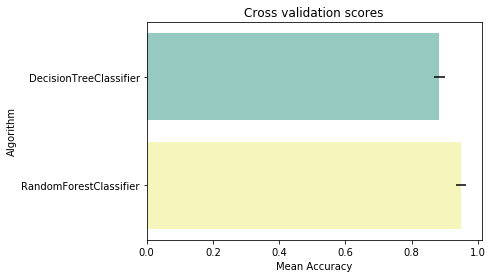

In [301]:
# Modeling step Test differents algorithms 

classifiers = []
classifiers.append(modeldt)
classifiers.append(modelrf)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,x, y , scoring = "accuracy", cv=kfolds,n_jobs= 4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTreeClassifier","RandomForestClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

DT: 0.902117 (0.022704)
Rf: 0.951081 (0.021122)


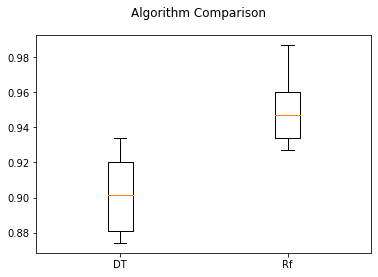

In [302]:
# Compare Algorithms
# prepare models
models = []
models.append(('DT', modeldt))
models.append(('Rf', modelrf))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model,x,y, cv=kfolds, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### ref : https://www.kaggle.com/archit9406/student-performance-analysis